In [55]:
import scanpy as sc
import pandas as pd

In [213]:
adata = sc.read_h5ad('./sc_adata.h5ad')
adata

AnnData object with n_obs × n_vars = 1926 × 19738
    obs: 'cell_type'

In [214]:
adata.obs['cell_type'].unique().tolist()

['Acinar cells',
 'Ductal _ terminal ductal like',
 'Ductal _ CRISP3 high_centroacinar like',
 'Cancer clone A',
 'Ductal _ MHC Class II',
 'Cancer clone B',
 'mDCs A',
 'Ductal _ APOL1 high_hypoxic',
 'Tuft cells',
 'mDCs B',
 'pDCs',
 'Endocrine cells',
 'Endothelial cells',
 'Macrophages A',
 'Mast cells',
 'Macrophages B',
 'T cells & NK cells',
 'Monocytes',
 'RBCs',
 'Fibroblasts']

In [215]:
a = adata[adata.obs[adata.obs['cell_type']=='Cancer clone A'].index]
a

View of AnnData object with n_obs × n_vars = 126 × 19738
    obs: 'cell_type'

In [216]:
n = adata[adata.obs[adata.obs['cell_type']=='T cells & NK cells'].index]
n

View of AnnData object with n_obs × n_vars = 40 × 19738
    obs: 'cell_type'

In [217]:
a.copy().T.write_h5ad('./a.h5ad')
n.copy().T.write_h5ad('./n.h5ad')

In [51]:
a

View of AnnData object with n_obs × n_vars = 126 × 2000
    obs: 'cell_type', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [20]:
a.copy().T

AnnData object with n_obs × n_vars = 19738 × 126
    var: 'cell_type'

In [192]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, exclude_highly_expressed=True)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(
    adata,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5,
    n_top_genes=2000
)
adata.raw = adata
adata._inplace_subset_var(adata.var['highly_variable'])

In [195]:
adata

AnnData object with n_obs × n_vars = 1909 × 2000
    obs: 'cell_type', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [194]:
a


View of AnnData object with n_obs × n_vars = 126 × 19738
    obs: 'cell_type'

In [54]:
n

View of AnnData object with n_obs × n_vars = 40 × 2000
    obs: 'cell_type', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [235]:
d1 = pd.read_csv('./500n.csv',sep=' ').T
d1

,Burn1_TF1,Burn2_TF1,Burn3_TF1,Burn4_TF1,A1_TF1,A2_TF1,A3_TF1,A4_TF1,A5_TF1,A6_TF1,...,HK9850,HK9851,HK9852,HK9853,HK9854,HK9855,HK9856,HK9857,HK9858,HK9859
cell1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
cell2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cell3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cell4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
cell5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cell497,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
cell498,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
cell499,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
d2 = pd.read_csv('./500a.csv',sep=' ').T
d2

,Burn1_TF1,Burn2_TF1,Burn3_TF1,Burn4_TF1,A1_TF1,A2_TF1,A3_TF1,A4_TF1,A5_TF1,A6_TF1,...,HK9850,HK9851,HK9852,HK9853,HK9854,HK9855,HK9856,HK9857,HK9858,HK9859
cell1,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
cell2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
cell3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
cell4,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
cell5,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell496,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,1,0
cell497,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
cell498,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
cell499,0,0,1,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,0


In [236]:
import random
import numpy as np

# Generate random coordinates aligned to the left
num1 = 500
middel1 = int(num1 * 0.4)
num1 = num1 - middel1
num2 = 500
middel2 = int(num2 * 0.4)
num2 = num2 - middel2

num_left_points = num1
left_coordinates = [(random.uniform(0, 7), random.uniform(0, 10)) for _ in range(num_left_points)]

# Generate random coordinates aligned to the right
num_right_points = num2
right_coordinates = [(random.uniform(13, 20), random.uniform(0, 10)) for _ in range(num_right_points)]

num_middle_points1 = middel1
middle_coordinates1 = [(random.uniform(7, 13), random.uniform(0, 10)) for _ in range(num_middle_points1)]
num_middle_points2 = middel2
middle_coordinates2 = [(random.uniform(7, 13), random.uniform(0, 10)) for _ in range(num_middle_points2)]

left_coordinates = np.array(left_coordinates)
middle_coordinates1 = np.array(middle_coordinates1)
middle_coordinates2 = np.array(middle_coordinates2)
right_coordinates = np.array(right_coordinates)


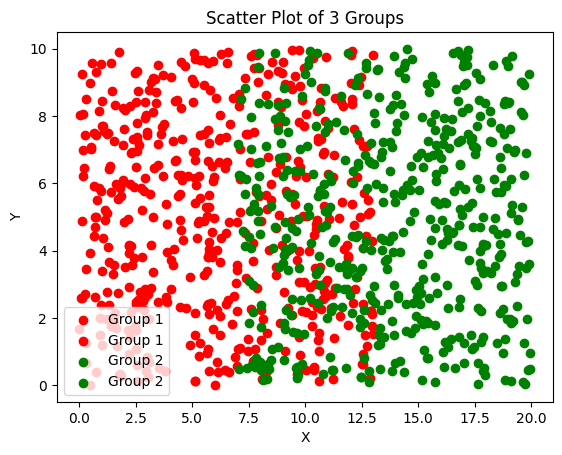

In [237]:
import matplotlib.pyplot as plt
plt.scatter(left_coordinates[:,0],left_coordinates[:,1], c='red', label='Group 1')
plt.scatter(middle_coordinates1[:,0], middle_coordinates1[:,1], c='red', label='Group 1')

plt.scatter(right_coordinates[:,0], right_coordinates[:,1], c='green', label='Group 2')
plt.scatter(middle_coordinates2[:,0], middle_coordinates2[:,1], c='green', label='Group 2')


# 添加标题和标签
plt.title('Scatter Plot of 3 Groups')
plt.xlabel('X')
plt.ylabel('Y')

# 添加图例
plt.legend()

# 显示散点图
plt.show()

In [263]:
d1.columns = a.to_df().columns

adata1 = sc.AnnData(d1)
# celltype = [ 'Cancer clone A' for i in range(len(adata1))]
celltype = [ 1 for i in range(len(adata1))]
adata1.to_df().columns = a.to_df().columns
x = np.concatenate((left_coordinates , middle_coordinates1), axis=0)[:,0]
y = np.concatenate((left_coordinates , middle_coordinates1), axis=0)[:,1]
meta = pd.DataFrame([x,y,celltype]).T
meta.columns = ['x','y','cell_type']
meta.index=adata1.to_df().index
adata1.obsm['meta']=meta
adata1

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_59983/2313595452.py:3: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1 = sc.AnnData(d1)


AnnData object with n_obs × n_vars = 500 × 19738
    obsm: 'meta'

In [264]:

adata1.to_df()

Genes,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
cell1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
cell5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
cell498,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell499,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
d2.columns = n.to_df().columns

adata2 = sc.AnnData(d2)
# celltype = [ 'Cancer clone A' for i in range(len(adata1))]
celltype = [ 2 for i in range(len(adata1))]
adata2.to_df().columns = n.to_df().columns
x = np.concatenate((right_coordinates , middle_coordinates2), axis=0)[:,0]
y = np.concatenate((right_coordinates , middle_coordinates2), axis=0)[:,1]
meta = pd.DataFrame([x,y,celltype]).T
meta.columns = ['x','y','cell_type']
meta.index=adata2.to_df().index
adata2.obsm['meta']=meta
adata2

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_59983/4161226486.py:3: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata2 = sc.AnnData(d2)


AnnData object with n_obs × n_vars = 500 × 19738
    obsm: 'meta'

In [266]:
adata1.obsm['meta']

,x,y,cell_type
cell1,5.687028,2.418413,1.0
cell2,6.228983,1.489587,1.0
cell3,2.469013,1.747566,1.0
cell4,0.524748,7.079356,1.0
cell5,2.268841,2.178180,1.0
...,...,...,...
cell496,12.565980,0.632704,1.0
cell497,8.954533,4.173934,1.0
cell498,8.707202,6.327078,1.0
cell499,8.037611,4.876753,1.0


In [267]:
adata2.obsm['meta']

,x,y,cell_type
cell1,13.084406,7.780139,2.0
cell2,15.155400,7.959488,2.0
cell3,19.303724,6.995417,2.0
cell4,18.877929,9.627585,2.0
cell5,19.718231,0.019936,2.0
...,...,...,...
cell496,12.340851,6.604485,2.0
cell497,11.628936,2.310567,2.0
cell498,12.597008,0.808818,2.0
cell499,7.328721,5.684519,2.0


In [271]:
datas = adata1.concatenate(adata2)
datas.obsm['meta'].index.name = 'cell'
datas.write_h5ad('./AN.h5ad')

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [270]:
datas.obsm['meta']

,x,y,cell_type
cell,,,
cell1-0,5.687028,2.418413,1.0
cell2-0,6.228983,1.489587,1.0
cell3-0,2.469013,1.747566,1.0
cell4-0,0.524748,7.079356,1.0
cell5-0,2.268841,2.178180,1.0
...,...,...,...
cell496-1,12.340851,6.604485,2.0
cell497-1,11.628936,2.310567,2.0
cell498-1,12.597008,0.808818,2.0


In [108]:
python3 splith5ad.py AN.h5ad demo/51 demo/pathways.tsv 1000

SyntaxError: invalid syntax (4255560211.py, line 1)

In [ ]:
python3 CytoTour.py demo/lr_database.csv demo/pathways.tsv demo/51 1000 AN.h5ad

In [273]:
df = pd.read_pickle('./CytoTour-jan-dev/cci_result.pkl')
df

{'cell_pair': {'2.0-2.0':      cell_sender cell_receiver  sender_type  receiver_type  distance  \
  0        cell1-1      cell94-1          2.0            2.0  0.298100   
  1        cell1-1     cell319-1          2.0            2.0  0.619113   
  2        cell1-1     cell246-1          2.0            2.0  0.637985   
  3        cell1-1      cell46-1          2.0            2.0  0.788594   
  4        cell1-1     cell278-1          2.0            2.0  0.790561   
  ...          ...           ...          ...            ...       ...   
  3951   cell500-1     cell425-1          2.0            2.0  0.369839   
  3952   cell500-1     cell377-1          2.0            2.0  0.463356   
  3953   cell500-1     cell369-1          2.0            2.0  0.487587   
  3954   cell500-1     cell305-1          2.0            2.0  0.519486   
  3955   cell500-1     cell387-1          2.0            2.0  0.671366   
  
        sender_id  receiver_id  
  0         500.0        593.0  
  1         500.0  

In [285]:
df['lr_score']

,cell_sender,cell_receiver,ligand,receptor,pred,set,species,co_exp_value,co_exp_number,co_exp_p,lr_score,rt_score,score
0,2.0,2.0,RSPO3,ITGB3,0.996135,novel,Human,0.082912,328.0,0.000000e+00,1.0,1.000000,1.000000
1,2.0,2.0,RSPO4,ITGB3,0.995180,novel,Human,0.086198,341.0,0.000000e+00,1.0,1.000000,1.000000
2,2.0,2.0,MSLN,ITGB3,0.994757,novel,Human,0.131193,519.0,0.000000e+00,1.0,1.000000,1.000000
3,2.0,2.0,IGFALS,ITGB3,0.994591,novel,Human,0.092770,367.0,0.000000e+00,1.0,1.000000,1.000000
4,2.0,2.0,LAMC3,ITGB3,0.994521,novel,Human,0.051567,204.0,0.000000e+00,1.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19481,2.0,2.0,BDNF,SLC12A1,0.871817,novel,Human,0.026289,104.0,4.662222e-10,1.0,0.998596,0.999298
19482,2.0,2.0,IL16,SLC12A1,0.847730,novel,Human,0.037412,148.0,1.554312e-14,1.0,0.998596,0.999298
19483,2.0,2.0,NTS,GPR161,0.862437,novel,Human,0.115774,458.0,0.000000e+00,1.0,0.577033,0.759627
19484,2.0,2.0,BDNF,ZNRF3,0.861189,novel,Human,0.051062,202.0,0.000000e+00,1.0,0.514616,0.717367


In [109]:
demo_data = sc.read_h5ad('./CytoTour-jan-dev/demo/pdac.h5ad')

In [280]:
datas.obsm['meta']

,x,y,cell_type
cell,,,
cell1-0,5.687028,2.418413,1.0
cell2-0,6.228983,1.489587,1.0
cell3-0,2.469013,1.747566,1.0
cell4-0,0.524748,7.079356,1.0
cell5-0,2.268841,2.178180,1.0
...,...,...,...
cell496-1,12.340851,6.604485,2.0
cell497-1,11.628936,2.310567,2.0
cell498-1,12.597008,0.808818,2.0


In [166]:
df.index.name

AnnData object with n_obs × n_vars = 4237 × 19738
    obsm: 'meta'

In [155]:
adata1.obsm['meta']

,x,y,celltype
cell1,4.725182,0.656584,Cancer clone A
cell2,0.76467,0.41429,Cancer clone A
cell3,6.881426,2.832486,Cancer clone A
cell4,4.780933,4.480992,Cancer clone A
cell5,1.931825,7.023056,Cancer clone A
...,...,...,...
cell122,9.892583,8.901989,Cancer clone A
cell123,7.932495,7.184597,Cancer clone A
cell124,10.621599,1.464029,Cancer clone A
cell125,12.73884,7.307877,Cancer clone A


In [174]:
demo_data.X

array([[0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 3., 0., 0.],
       [0., 0., 7., ..., 1., 0., 0.],
       [1., 0., 1., ..., 2., 0., 0.]], dtype=float32)

In [175]:
import scipy

In [182]:
col_means = np.mean(adata.X, axis=0)
col_means
adata.X = (adata.X > col_means).astype(int)
# 计算每个基因的非零比率
gene_ratio = np.count_nonzero(adata.X, axis=0) / adata.X.shape[0]
gene_ratio_df = pd.DataFrame(gene_ratio , index=valid_gene, columns=['Non-Zero Ratio'])


NameError: name 'valid_gene' is not defined

In [176]:
isinstance(adata1.X, scipy.sparse.spmatrix)

False

In [184]:
test_data = sc.read_h5ad('./CytoTour-jan-dev/A1.h5ad')
test_data

AnnData object with n_obs × n_vars = 126 × 2000
    obsm: 'meta'

In [185]:
test_data.obsm['meta']

,x,y,celltype
cell1,4.725182,0.656584,1.0
cell2,0.764670,0.414290,1.0
cell3,6.881426,2.832486,1.0
cell4,4.780933,4.480992,1.0
cell5,1.931825,7.023056,1.0
...,...,...,...
cell122,9.892583,8.901989,1.0
cell123,7.932495,7.184597,1.0
cell124,10.621599,1.464029,1.0
cell125,12.738840,7.307877,1.0


In [186]:
isinstance(test_data.X, scipy.sparse.spmatrix)

False